In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data = pd.read_csv('../data/application_train_vf_after_test_stat.csv')

In [96]:
data.columns

Index(['Unnamed: 0', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'AMT_REQ_CREDIT_BUREAU_DA

## Catégorielles

In [97]:
for col in data.select_dtypes(include ='object').columns:
    print(f"{col} : {data[col].nunique()} catégories différentes")

NAME_CONTRACT_TYPE : 2 catégories différentes
CODE_GENDER : 3 catégories différentes
FLAG_OWN_CAR : 2 catégories différentes
FLAG_OWN_REALTY : 2 catégories différentes
NAME_TYPE_SUITE : 7 catégories différentes
NAME_INCOME_TYPE : 8 catégories différentes
NAME_EDUCATION_TYPE : 5 catégories différentes
NAME_FAMILY_STATUS : 6 catégories différentes
NAME_HOUSING_TYPE : 6 catégories différentes
OCCUPATION_TYPE : 18 catégories différentes
WEEKDAY_APPR_PROCESS_START : 7 catégories différentes
ORGANIZATION_TYPE : 58 catégories différentes
FONDKAPREMONT_MODE : 4 catégories différentes
HOUSETYPE_MODE : 3 catégories différentes
WALLSMATERIAL_MODE : 7 catégories différentes
EMERGENCYSTATE_MODE : 2 catégories différentes
date_mensuelle : 96 catégories différentes


# Variables numériques

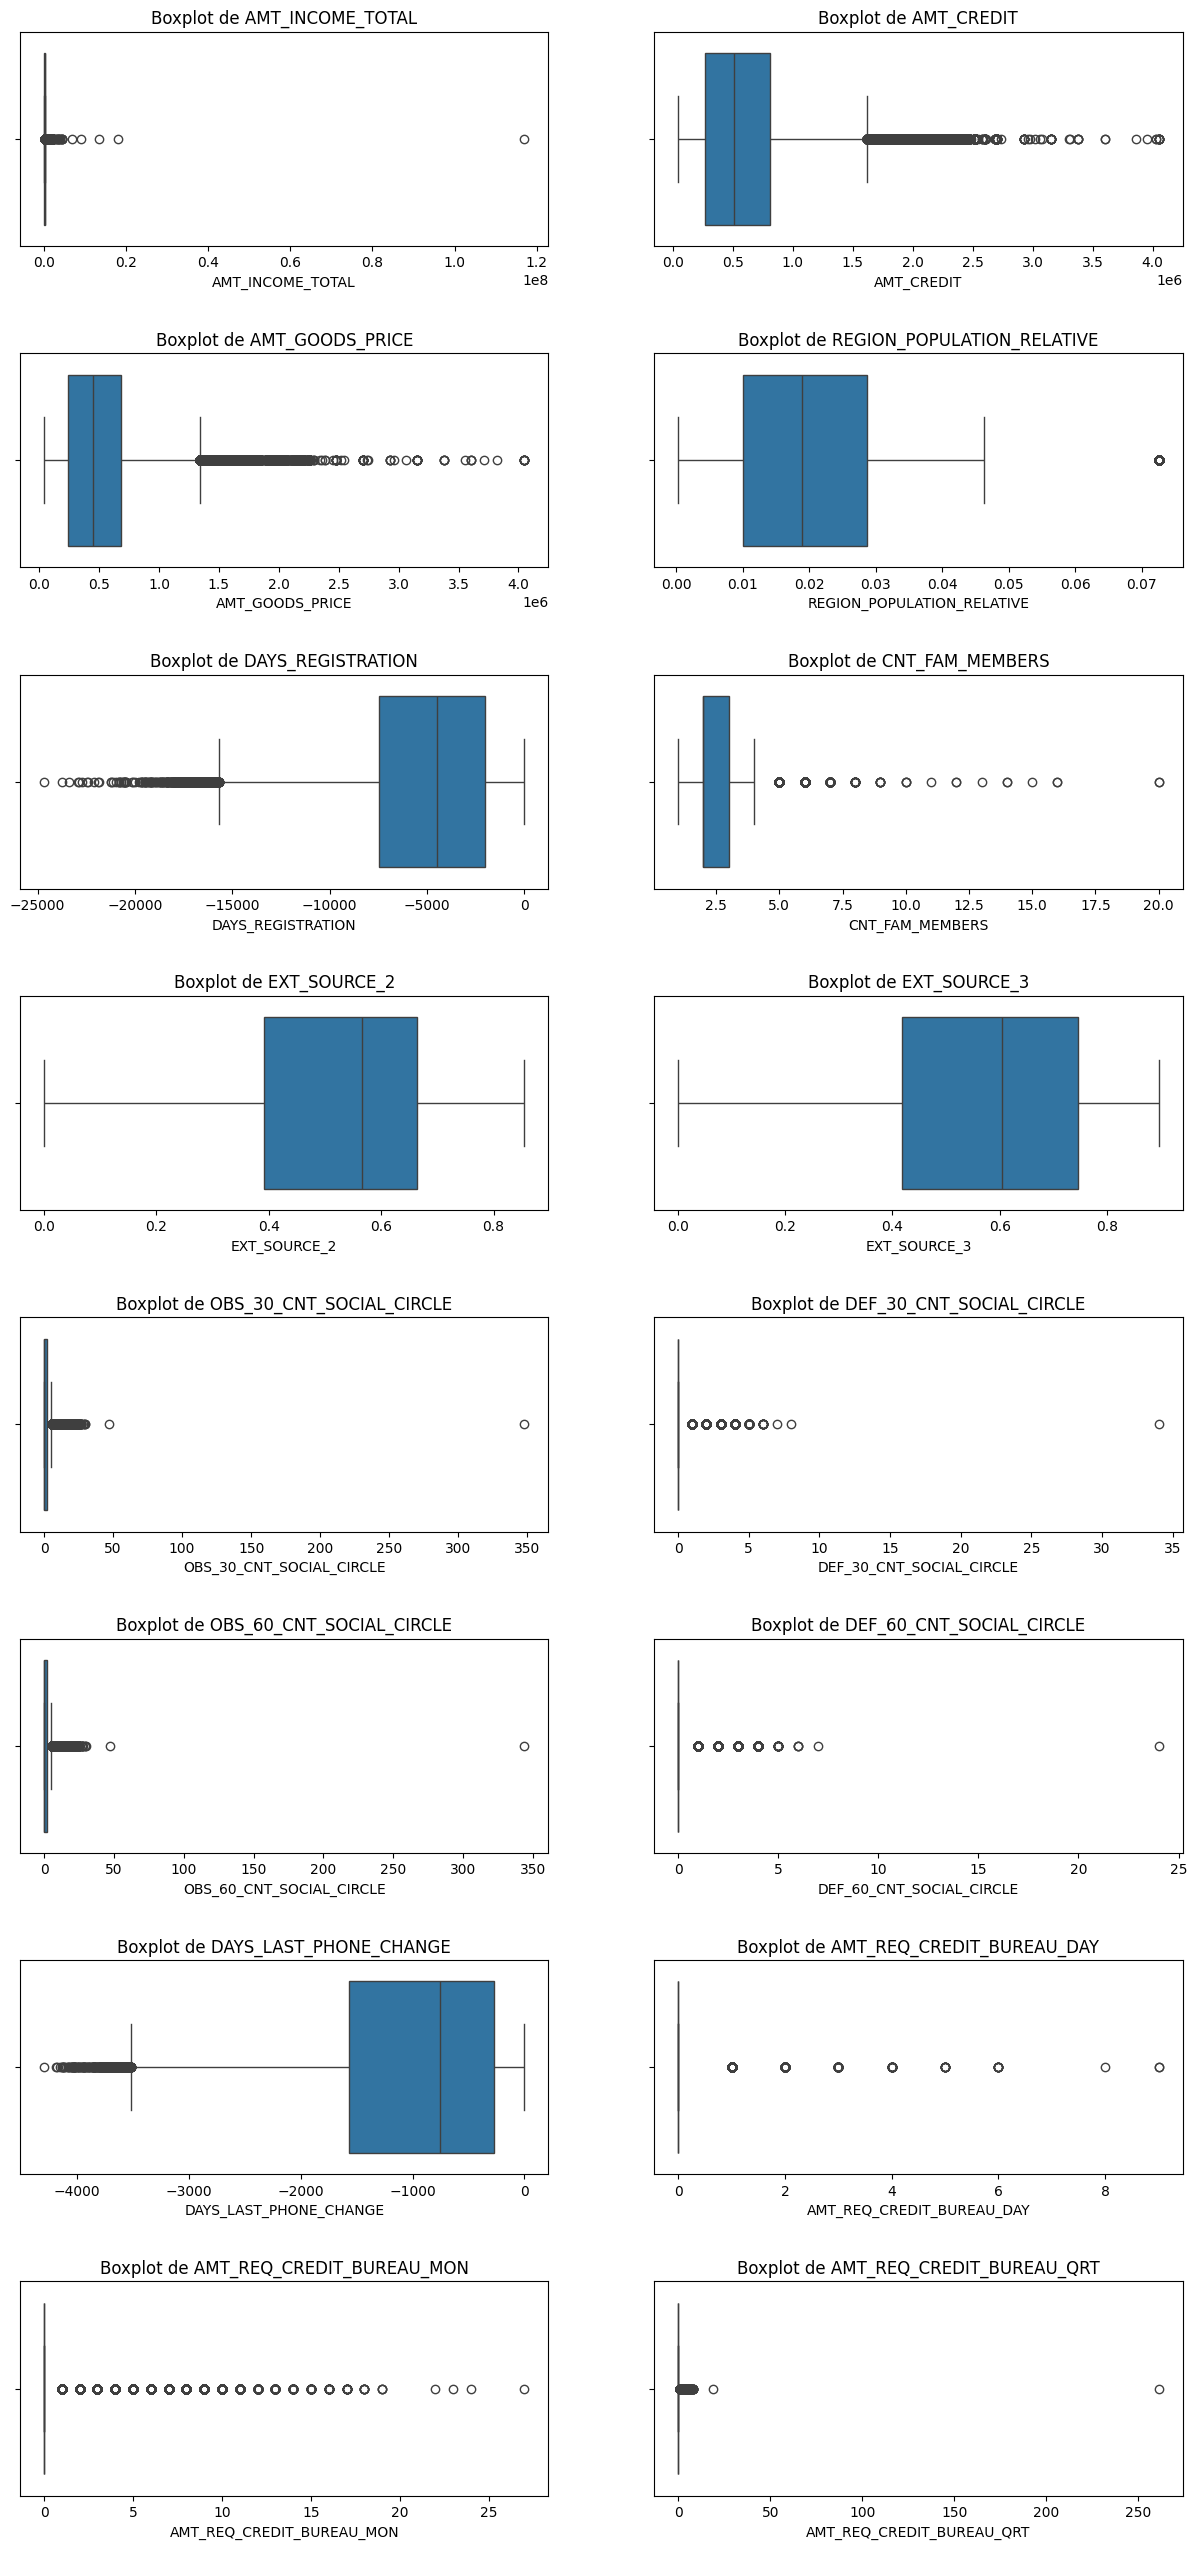

In [98]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

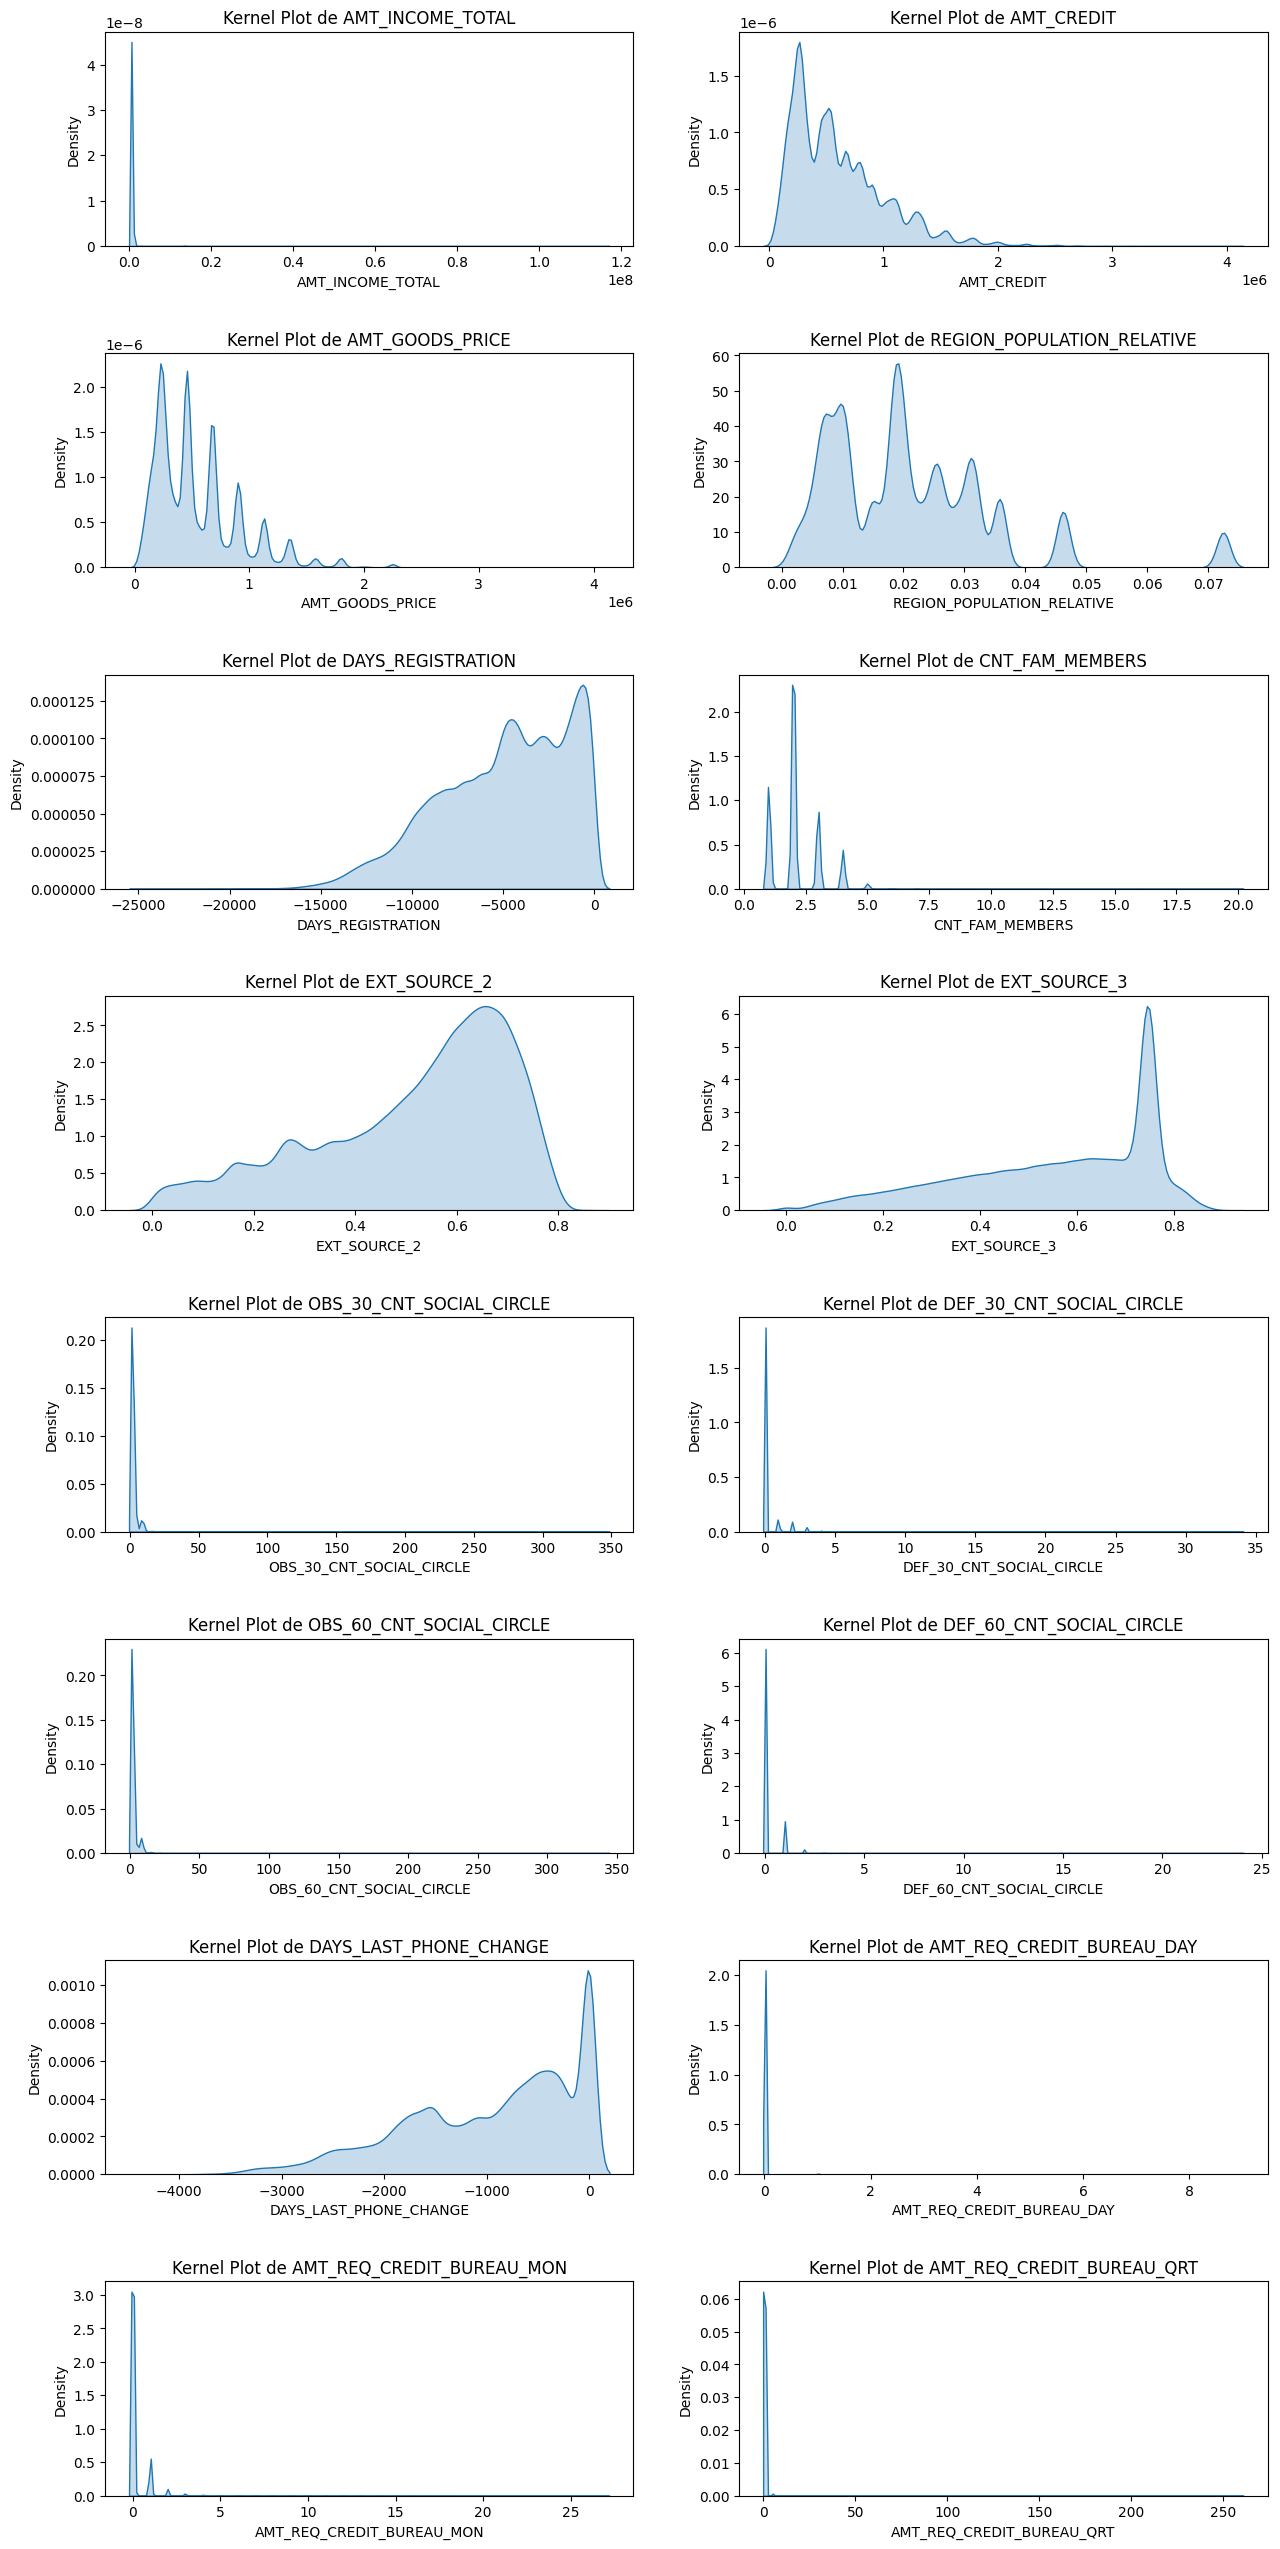

In [99]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Discrétisation

## Catégorielles

## NAME_TYPE_SUITE

In [100]:
list_mean = []
for cat in data['NAME_TYPE_SUITE'].unique():
    moyenne = data[data['NAME_TYPE_SUITE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_TYPE_SUITE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne           family
0  0.092666          Other_B
1  0.081481  Group of people
2  0.081395          Other_A
3  0.077876    Unaccompanied
4  0.074571  Spouse, partner
5  0.070705           Family
6  0.070089         Children

In [101]:
other = ['Other_B' , 'Group of people', 'Other_A']
alone = ["Unaccompanied"]  
not_alone = ['Spouse, partner', 'Family', 'Children']

data['NAME_TYPE_SUITE_discret'] = np.select(
    [
        data['NAME_TYPE_SUITE'].isin(other),
        data['NAME_TYPE_SUITE'].isin(alone),
        data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['other', 'alone', 'not_alone'],
    default='other')

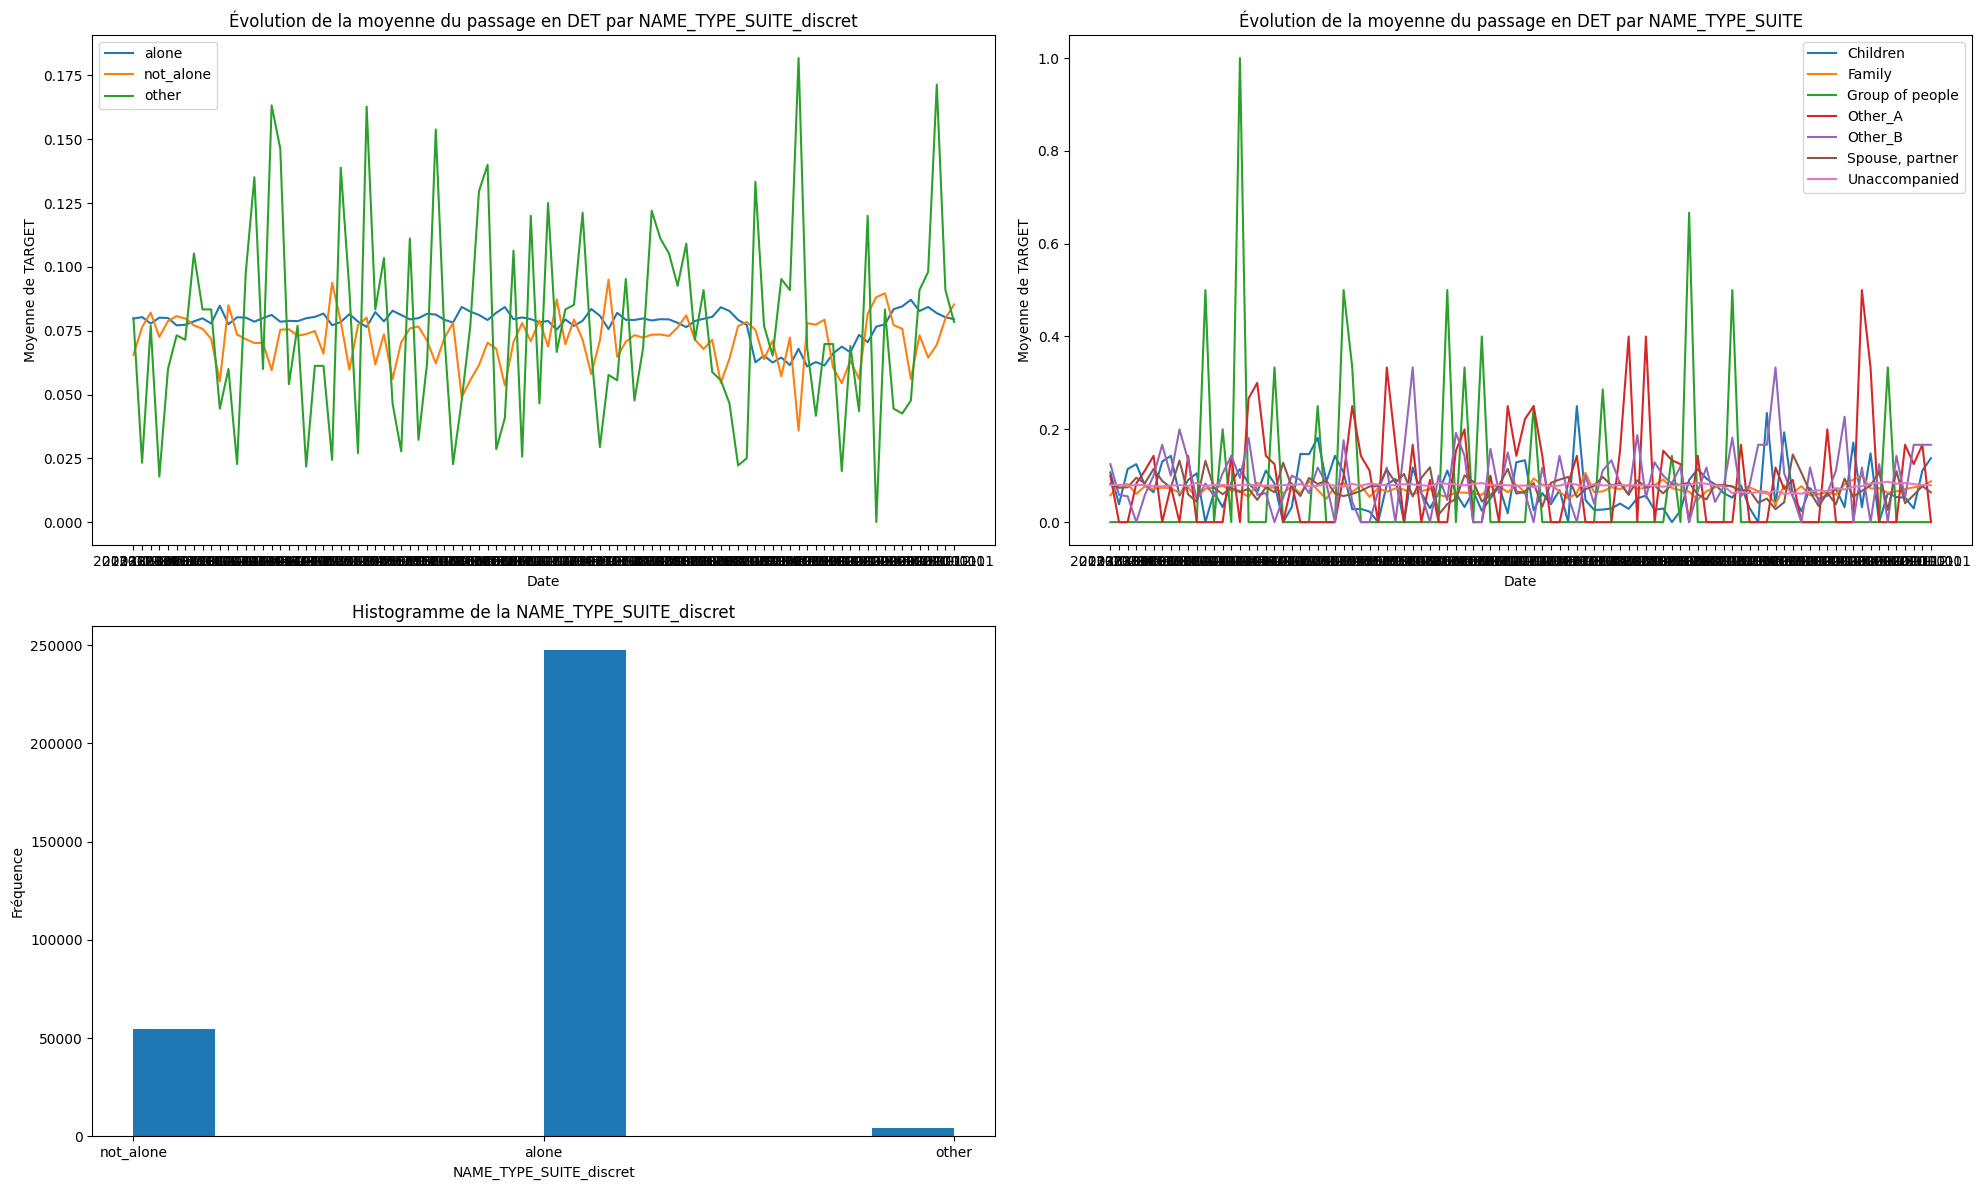

In [102]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['NAME_TYPE_SUITE_discret', 'NAME_TYPE_SUITE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'NAME_TYPE_SUITE_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_TYPE_SUITE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_TYPE_SUITE_discret')
axes[1, 0].set_xlabel('NAME_TYPE_SUITE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_INCOME_TYPE

In [103]:
list_mean = []
for cat in data['NAME_INCOME_TYPE'].unique():
    moyenne = data[data['NAME_INCOME_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['INCOME'] = data['NAME_INCOME_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                INCOME
0  0.400000       Maternity leave
1  0.363636            Unemployed
2  0.091305               Working
3  0.070689  Commercial associate
4  0.054736         State servant
5  0.051256             Pensioner
6  0.000000               Student
7  0.000000           Businessman

In [104]:
low_income = ['Maternity leave' , 'Unemployed']
high_income = ["Working", "Commercial associate", "Businessman"]
other = ['State servant', 'Pensioner', 'Student']

data['NAME_INCOME_TYPE_discret'] = np.select(
    [
        data['NAME_INCOME_TYPE'].isin(low_income),
        data['NAME_INCOME_TYPE'].isin(high_income),
        data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['low_income', 'high_income', 'other'],
    default='other')

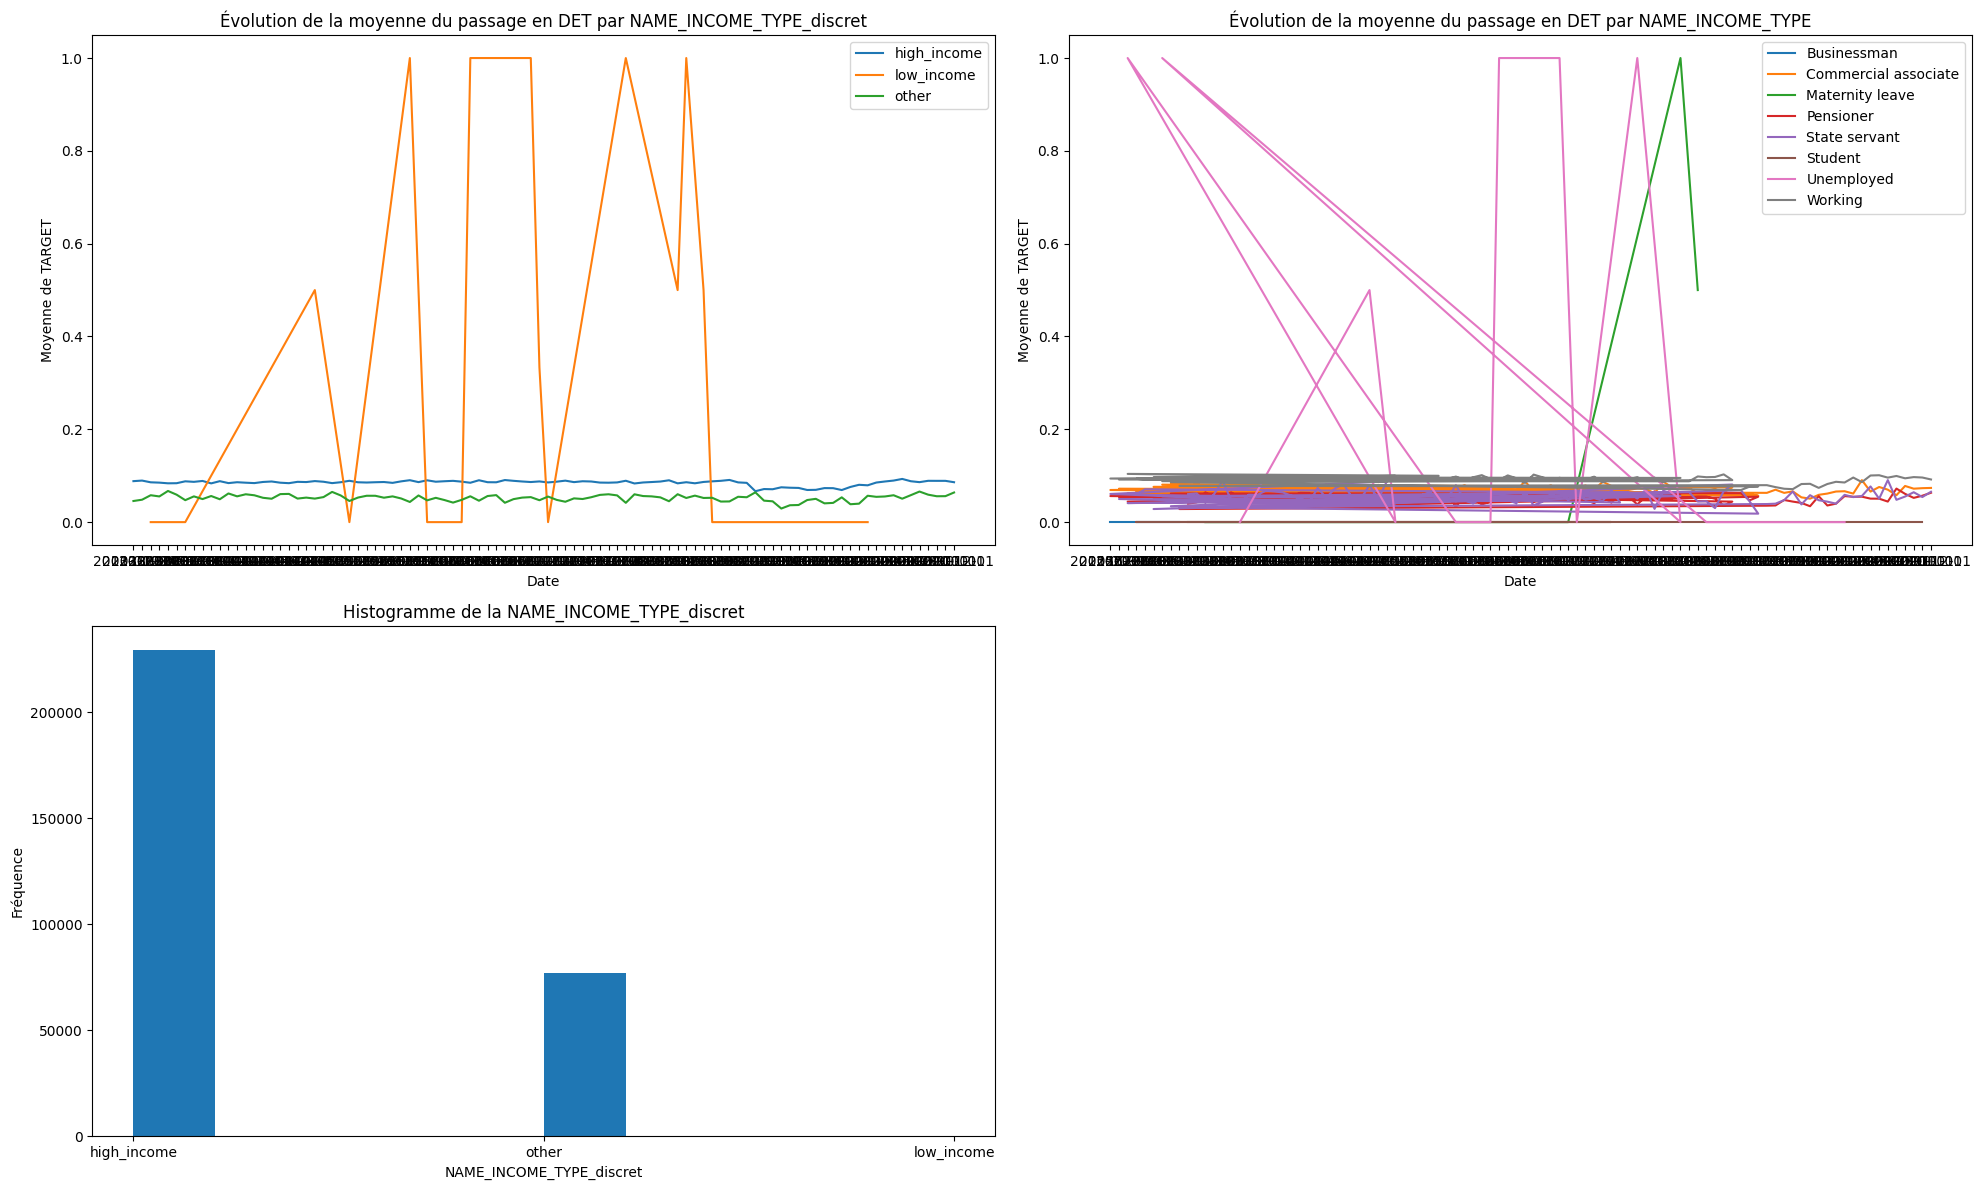

In [105]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['NAME_INCOME_TYPE_discret', 'NAME_INCOME_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_INCOME_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_INCOME_TYPE_discret')
axes[1, 0].set_xlabel('NAME_INCOME_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_EDUCATION_TYPE

In [106]:
list_mean = []
for cat in data['NAME_EDUCATION_TYPE'].unique():
    moyenne = data[data['NAME_EDUCATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['education'] = data['NAME_EDUCATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                      education
0  0.105554                Lower secondary
1  0.084983  Secondary / secondary special
2  0.079926              Incomplete higher
3  0.050863               Higher education
4  0.018293                Academic degree

In [107]:
lower = ["Lower_education", "Secondary / secondary special", "Incomplete higher"]
higher = ["Higher education", "Academic degree"]


data['NAME_EDUCATION_TYPE_discret'] = np.select(
    [
        data['NAME_EDUCATION_TYPE'].isin(lower),
        data['NAME_EDUCATION_TYPE'].isin(higher),
        # data['NAME_EDUCATION_TYPE'].isin(unknown)
    ],
    ['lower', 'higher'],
    default='lower')

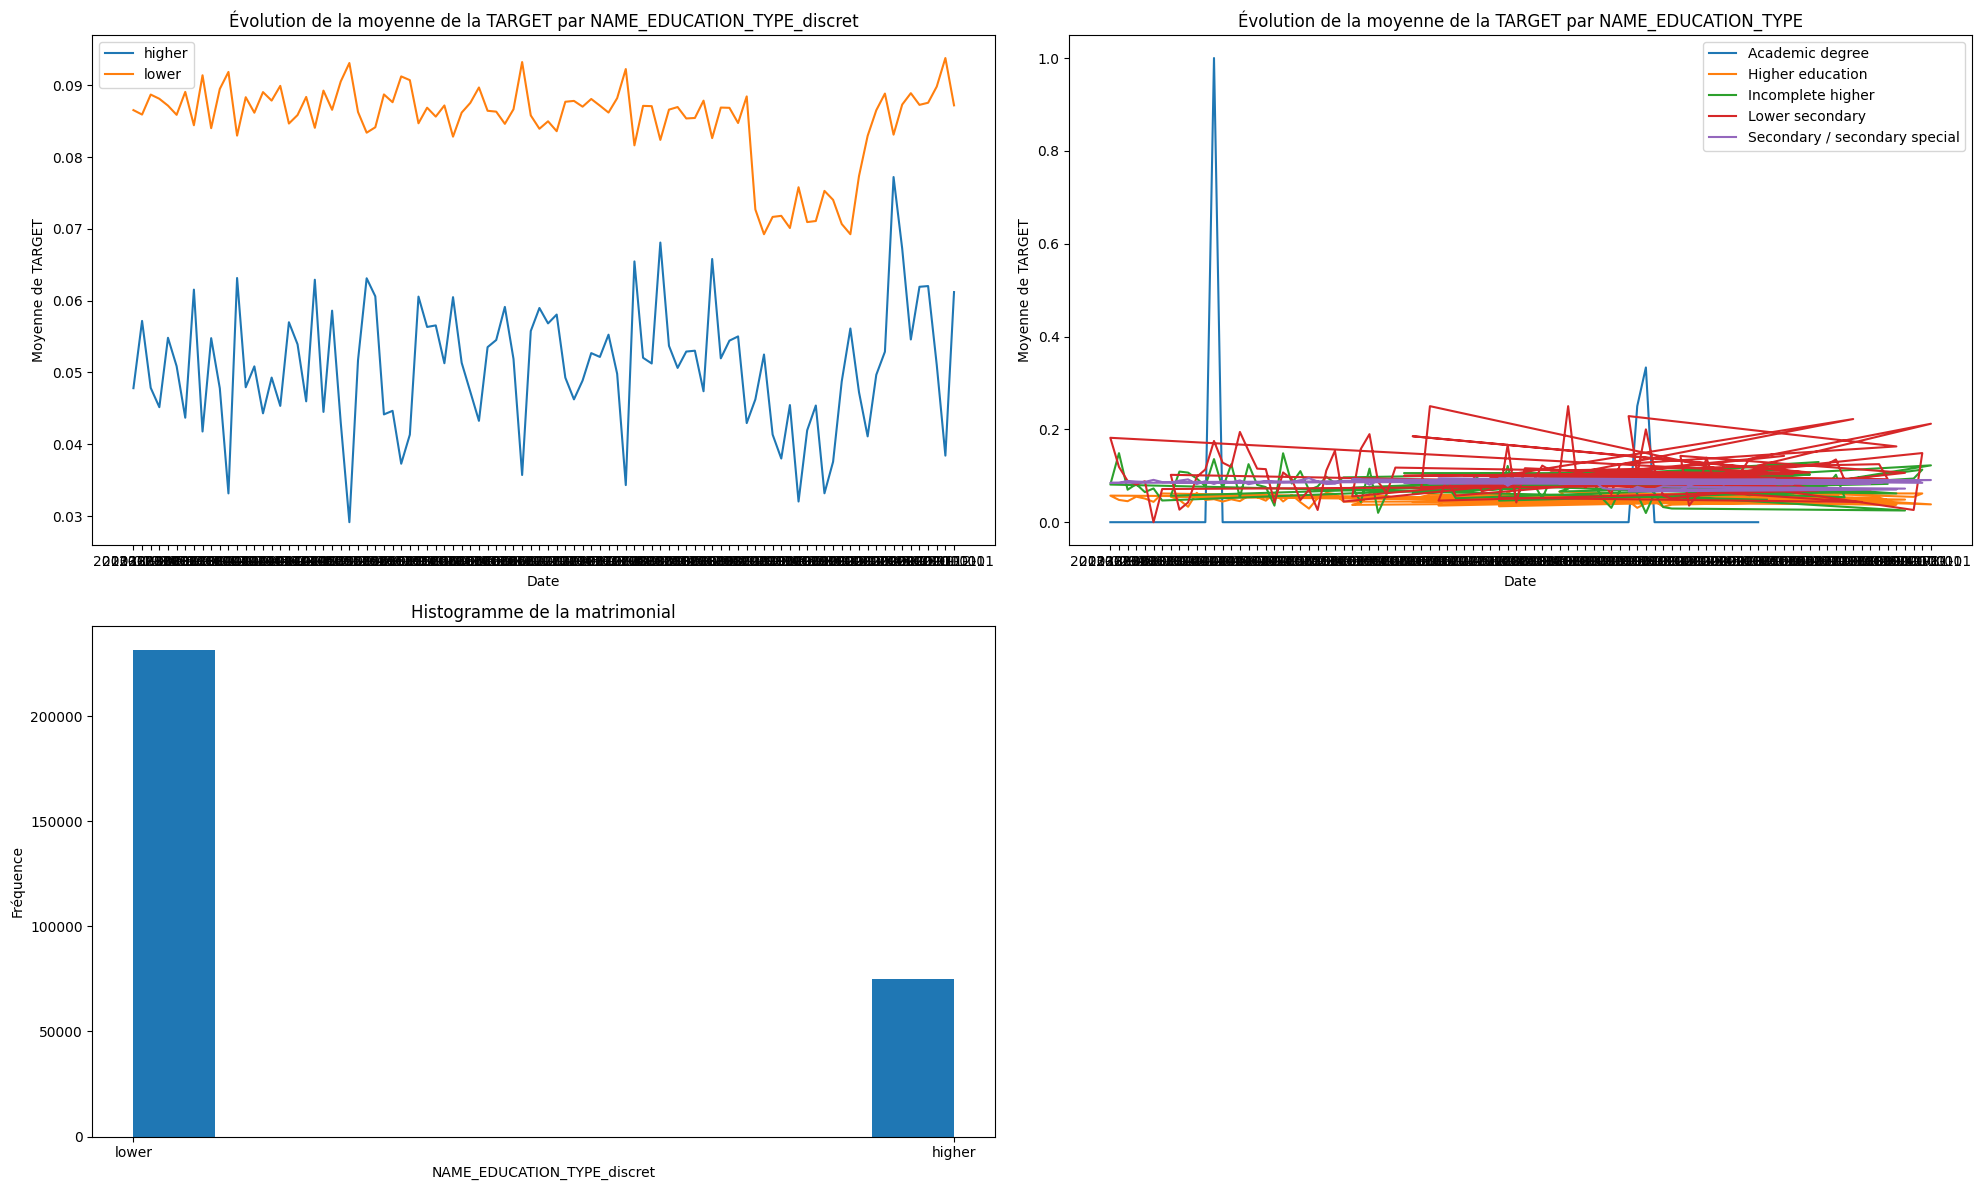

In [108]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['NAME_EDUCATION_TYPE_discret', 'NAME_EDUCATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_EDUCATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('NAME_EDUCATION_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_FAMILY_STATUS

In [109]:
list_mean = []
for cat in data['NAME_FAMILY_STATUS'].unique():
    moyenne = data[data['NAME_FAMILY_STATUS']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_FAMILY_STATUS'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                family
0  0.094162        Civil marriage
1  0.093574  Single / not married
2  0.078462             Separated
3  0.071720               Married
4  0.055784                 Widow
5  0.000000               Unknown

In [110]:
alone = ["Single / not married", "Separated","Widow", "Security staff", "Laborers"]
couple = ["Civil marriage", "Married"]
unknown = ["Unknown"]


data['NAME_FAMILY_STATUS_discret'] = np.select(
    [
        data['NAME_FAMILY_STATUS'].isin(alone),
        data['NAME_FAMILY_STATUS'].isin(couple),
        data['NAME_FAMILY_STATUS'].isin(unknown)
    ],
    ['alone', 'couple', 'unknown'],
    default='couple')

In [111]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['NAME_FAMILY_STATUS_discret', 'NAME_FAMILY_STATUS']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_FAMILY_STATUS_discret"])
axes[1, 0].set_title('Histogramme de la NAME_FAMILY_STATUS_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## OCCUPATION_TYPE

In [112]:
list_mean = []
for cat in data['OCCUPATION_TYPE'].unique():
    moyenne = data[data['OCCUPATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['OCCUPATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                 family
0   0.163127     Low-skill Laborers
1   0.107811                Drivers
2   0.105460   Waiters/barmen staff
3   0.101827         Security staff
4   0.100789               Laborers
5   0.099797          Cooking staff
6   0.091405            Sales staff
7   0.090240         Cleaning staff
8   0.074866          Realty agents
9   0.066923            Secretaries
10  0.063720         Medicine staff
11  0.062857               IT staff
12  0.062098  Private service staff
13  0.059924             Core staff
14  0.059155               Managers
15  0.058929               HR staff
16  0.057811  High skill tech staff
17  0.045589            Accountants

In [113]:
low_skilled = ["Low-skill Laborers", "Drivers","Waiters/barmen staff", "Security staff", "Laborers"]
middle_skilled = ["Sales staff", "Cooking staff", "Cleaning staff", "Realty agents", "Secretaries"]
high_skilled = ["Medicine staff", "IT staff", "Private service staff", "Managers", "Core staff", "HR staff", "Accountants", "High skilled tech staff"]


data['OCCUPATION_TYPE_discret'] = np.select(
    [
        data['OCCUPATION_TYPE'].isin(low_skilled),
        data['OCCUPATION_TYPE'].isin(middle_skilled),
        data['OCCUPATION_TYPE'].isin(high_skilled)
    ],
    ['low_skilled', 'middle_skilled', 'high_skilled'],
    default='middle_skilled')

In [114]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['OCCUPATION_TYPE_discret', 'OCCUPATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'OCCUPATION_TYPE_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["OCCUPATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la OCCUPATION_TYPE_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_HOUSING_TYPE

In [115]:
list_mean = []
for cat in data['NAME_HOUSING_TYPE'].unique():
    moyenne = data[data['NAME_HOUSING_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['housing'] = data['NAME_HOUSING_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne              housing
0  0.118277     Rented apartment
1  0.110772         With parents
2  0.080831  Municipal apartment
3  0.076029      Co-op apartment
4  0.074103    House / apartment
5  0.061781     Office apartment

## WEEKDAY_APPR_PROCESS_START

In [116]:
list_mean = []
for cat in data['WEEKDAY_APPR_PROCESS_START'].unique():
    moyenne = data[data['WEEKDAY_APPR_PROCESS_START']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['weekday'] = data['WEEKDAY_APPR_PROCESS_START'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne    weekday
0  0.080042    TUESDAY
1  0.077367  WEDNESDAY
2  0.077049     FRIDAY
3  0.076853   THURSDAY
4  0.075548     SUNDAY
5  0.075008   SATURDAY
6  0.073552     MONDAY

In [117]:
weekdays = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY"]
weekends = ["SATURDAY", "SUNDAY"]

data['WEEKDAY_APPR_PROCESS_START_discret'] = np.select(
    [
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekdays),
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekends),
        # data['WEEKDAY_APPR_PROCESS_START'].isin(high_skilled)
    ],
    ['weekdays', 'weekends'],
    default='weekdays')

In [118]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['WEEKDAY_APPR_PROCESS_START_discret', 'WEEKDAY_APPR_PROCESS_START']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'WEEKDAY_APPR_PROCESS_START_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["WEEKDAY_APPR_PROCESS_START_discret"])
axes[1, 0].set_title('Histogramme de la WEEKDAY_APPR_PROCESS_START_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


VARS QUE L'ON TOUCHE PAS :
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR

CATEGORIELLES A POTENTIELLEMENT GARDER APRES DISCRETISATION : 
- NAME_EDUCATION_TYPE (attention à la distribution)
- OCCUPATION_TYPE (attention aux croisements)

CATEGORIELLES A DEGAGER :
- WEEKDAY_APPR_PROCESS_START
- NAME_FAMILY_STATUS
- NAME_INCOME_TYPE
- NAME_TYPE_SUITE

In [119]:
#data.drop(columns=["WEEKDAY_APPR_PROCESS_START", "NAME_FAMILY_STATUS", "NAME_INCOME_TYPE", "NAME_TYPE_SUITE", ""],
#          axis=1, inplace=True
#          )


## FONDKAPREMONT_MODE

In [120]:
list_mean = []
for cat in data['FONDKAPREMONT_MODE'].unique():
    moyenne = data[data['FONDKAPREMONT_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['fondkapremont'] = data['FONDKAPREMONT_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne          fondkapremont
0  0.072525          not specified
1  0.066343       reg oper account
2  0.062157  reg oper spec account
3  0.054841       org spec account

In [121]:
not_specified = ['not specified']
reg = ["reg oper account", "reg oper spec account", "org spec account"]  
# not_alone = ['Spouse, partner', 'Family', 'Children']

data['FONDKAPREMONT_MODE_discret'] = np.select(
    [
        data['FONDKAPREMONT_MODE'].isin(not_specified),
        data['FONDKAPREMONT_MODE'].isin(reg),
        # data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['not_specified', 'reg'],
    default='not_specified')

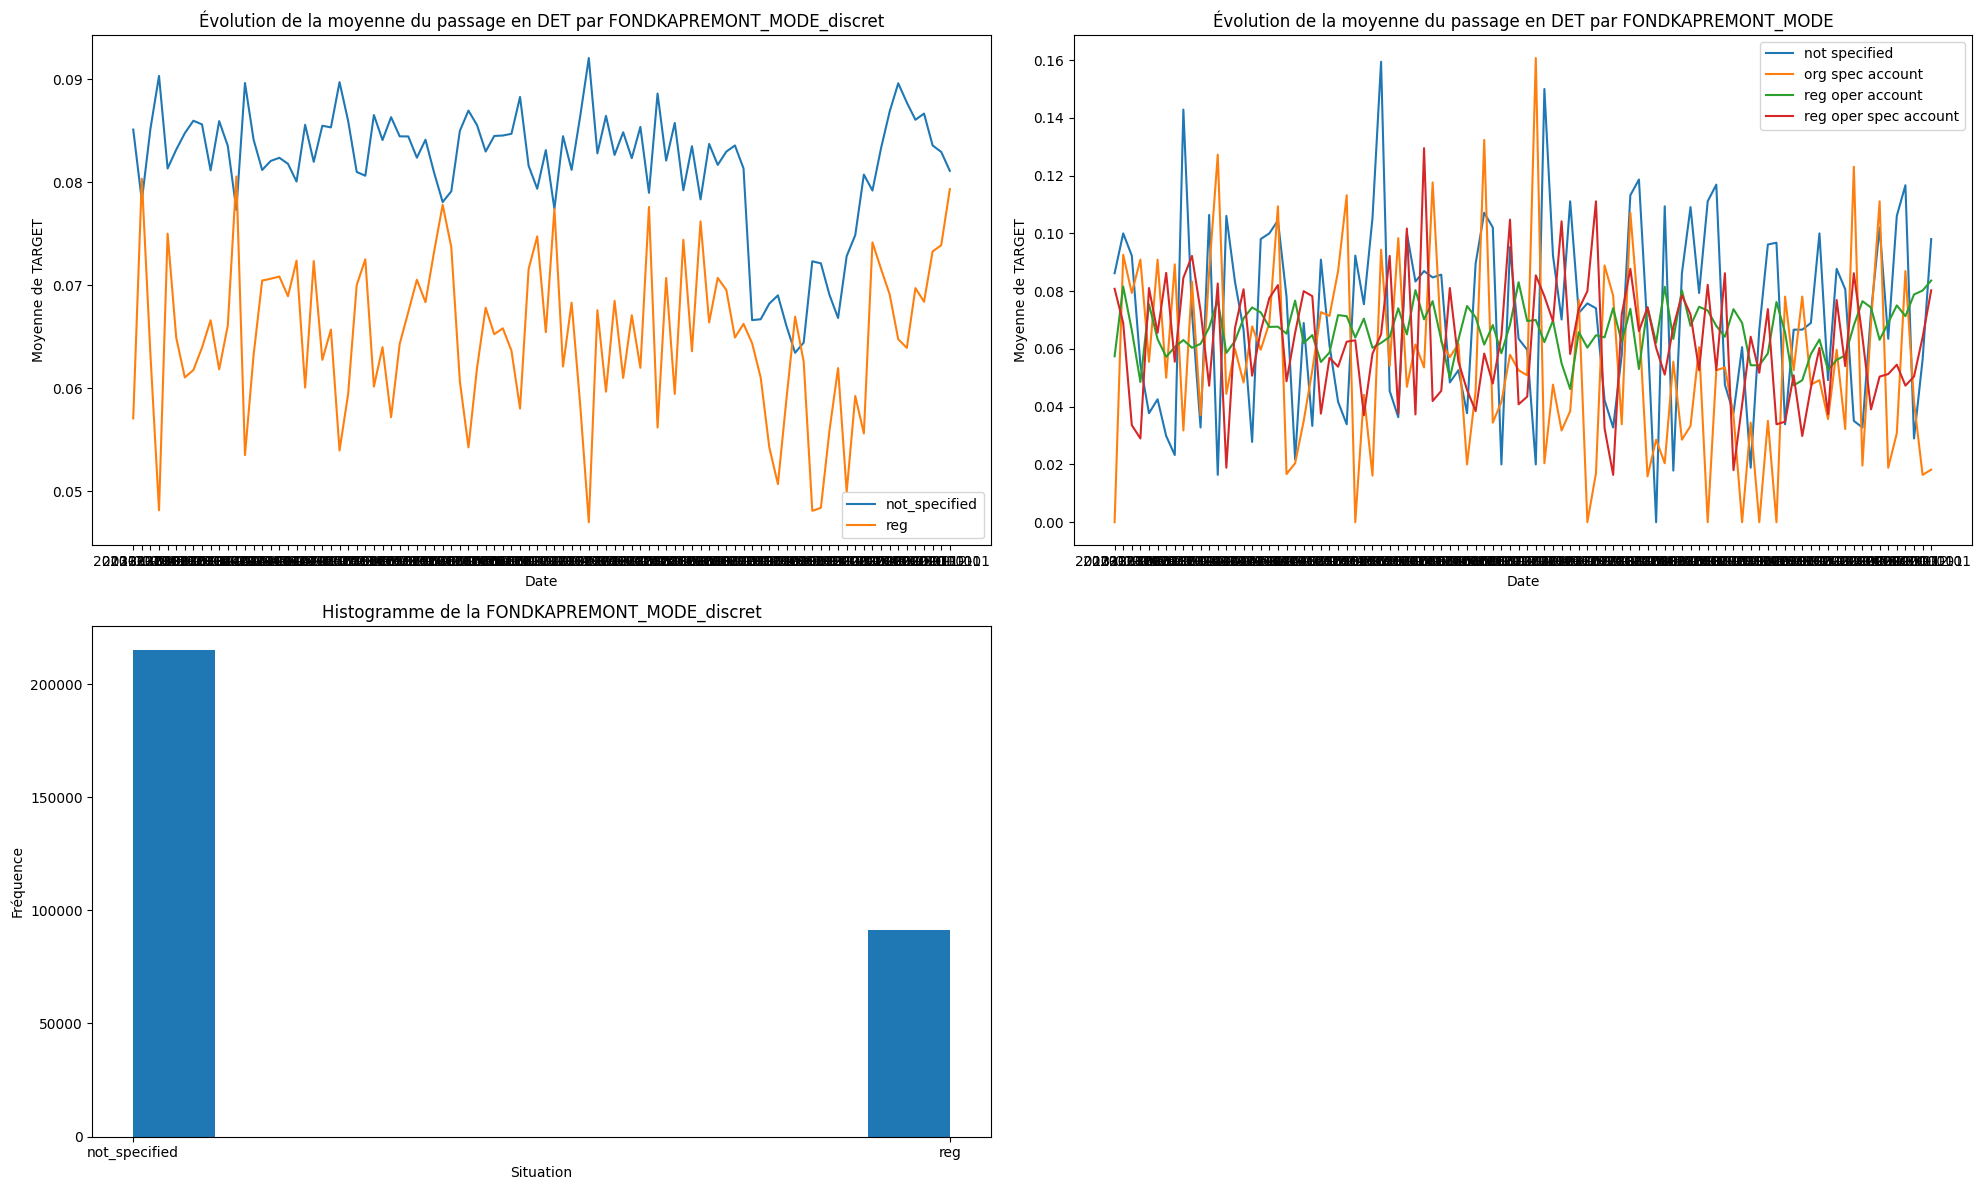

In [122]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['FONDKAPREMONT_MODE_discret', 'FONDKAPREMONT_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'fondkapremont' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["FONDKAPREMONT_MODE_discret"])
axes[1, 0].set_title('Histogramme de la FONDKAPREMONT_MODE_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## HOUSETYPE_MODE

In [123]:
list_mean = []
for cat in data['HOUSETYPE_MODE'].unique():
    moyenne = data[data['HOUSETYPE_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['HOUSETYPE'] = data['HOUSETYPE_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne         HOUSETYPE
0  0.095366  specific housing
1  0.077371    terraced house
2  0.066041    block of flats

In [124]:
houses = ['specific housing', "terraced house"]
appartment = ["block of flats"]
# other = ['State servant', 'Pensioner', 'Student']

data['HOUSETYPE_MODE_discret'] = np.select(
    [
        data['HOUSETYPE_MODE'].isin(houses),
        data['HOUSETYPE_MODE'].isin(appartment),
        # data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['houses', 'appartment'],
    default='houses')

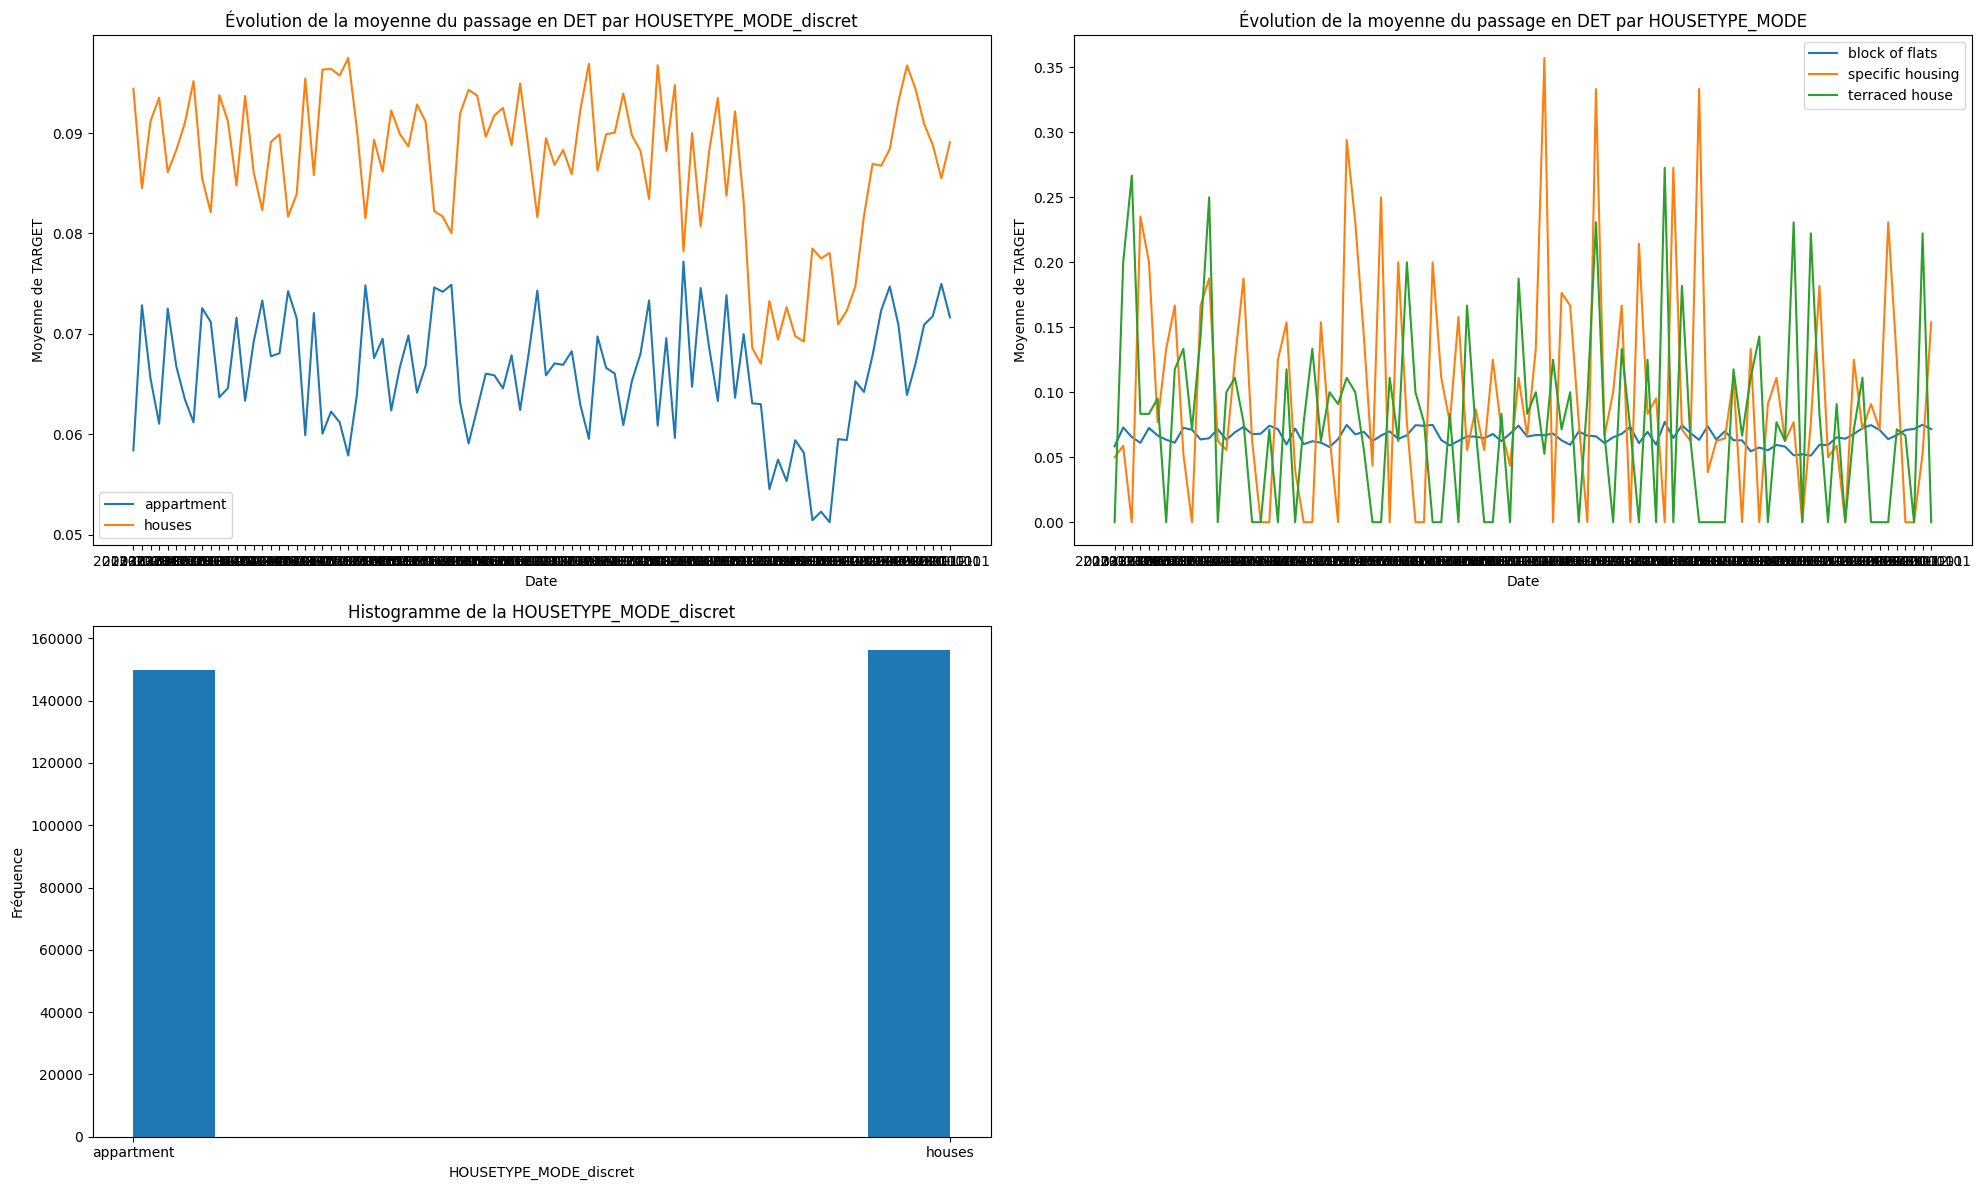

In [125]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['HOUSETYPE_MODE_discret', 'HOUSETYPE_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["HOUSETYPE_MODE_discret"])
axes[1, 0].set_title('Histogramme de la HOUSETYPE_MODE_discret')
axes[1, 0].set_xlabel('HOUSETYPE_MODE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## WALLSMATERIAL_MODE

In [126]:
list_mean = []
for cat in data['WALLSMATERIAL_MODE'].unique():
    moyenne = data[data['WALLSMATERIAL_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['WALLSMATERIAL'] = data['WALLSMATERIAL_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne WALLSMATERIAL
0  0.092238        Wooden
1  0.079110        Others
2  0.071304         Mixed
3  0.070500  Stone, brick
4  0.065732         Block
5  0.060187         Panel
6  0.044532    Monolithic

In [127]:
natural = ["Wooden", "Stone, brick"]
created = ["Block","Mixed", "Panel", "Monolithic"]
other = ["Others"]

data['WALLSMATERIAL_MODE_discret'] = np.select(
    [
        data['WALLSMATERIAL_MODE'].isin(natural),
        data['WALLSMATERIAL_MODE'].isin(created),
        data['WALLSMATERIAL_MODE'].isin(other)
    ],
    ['natural', 'created',"other"],
    default='natural')

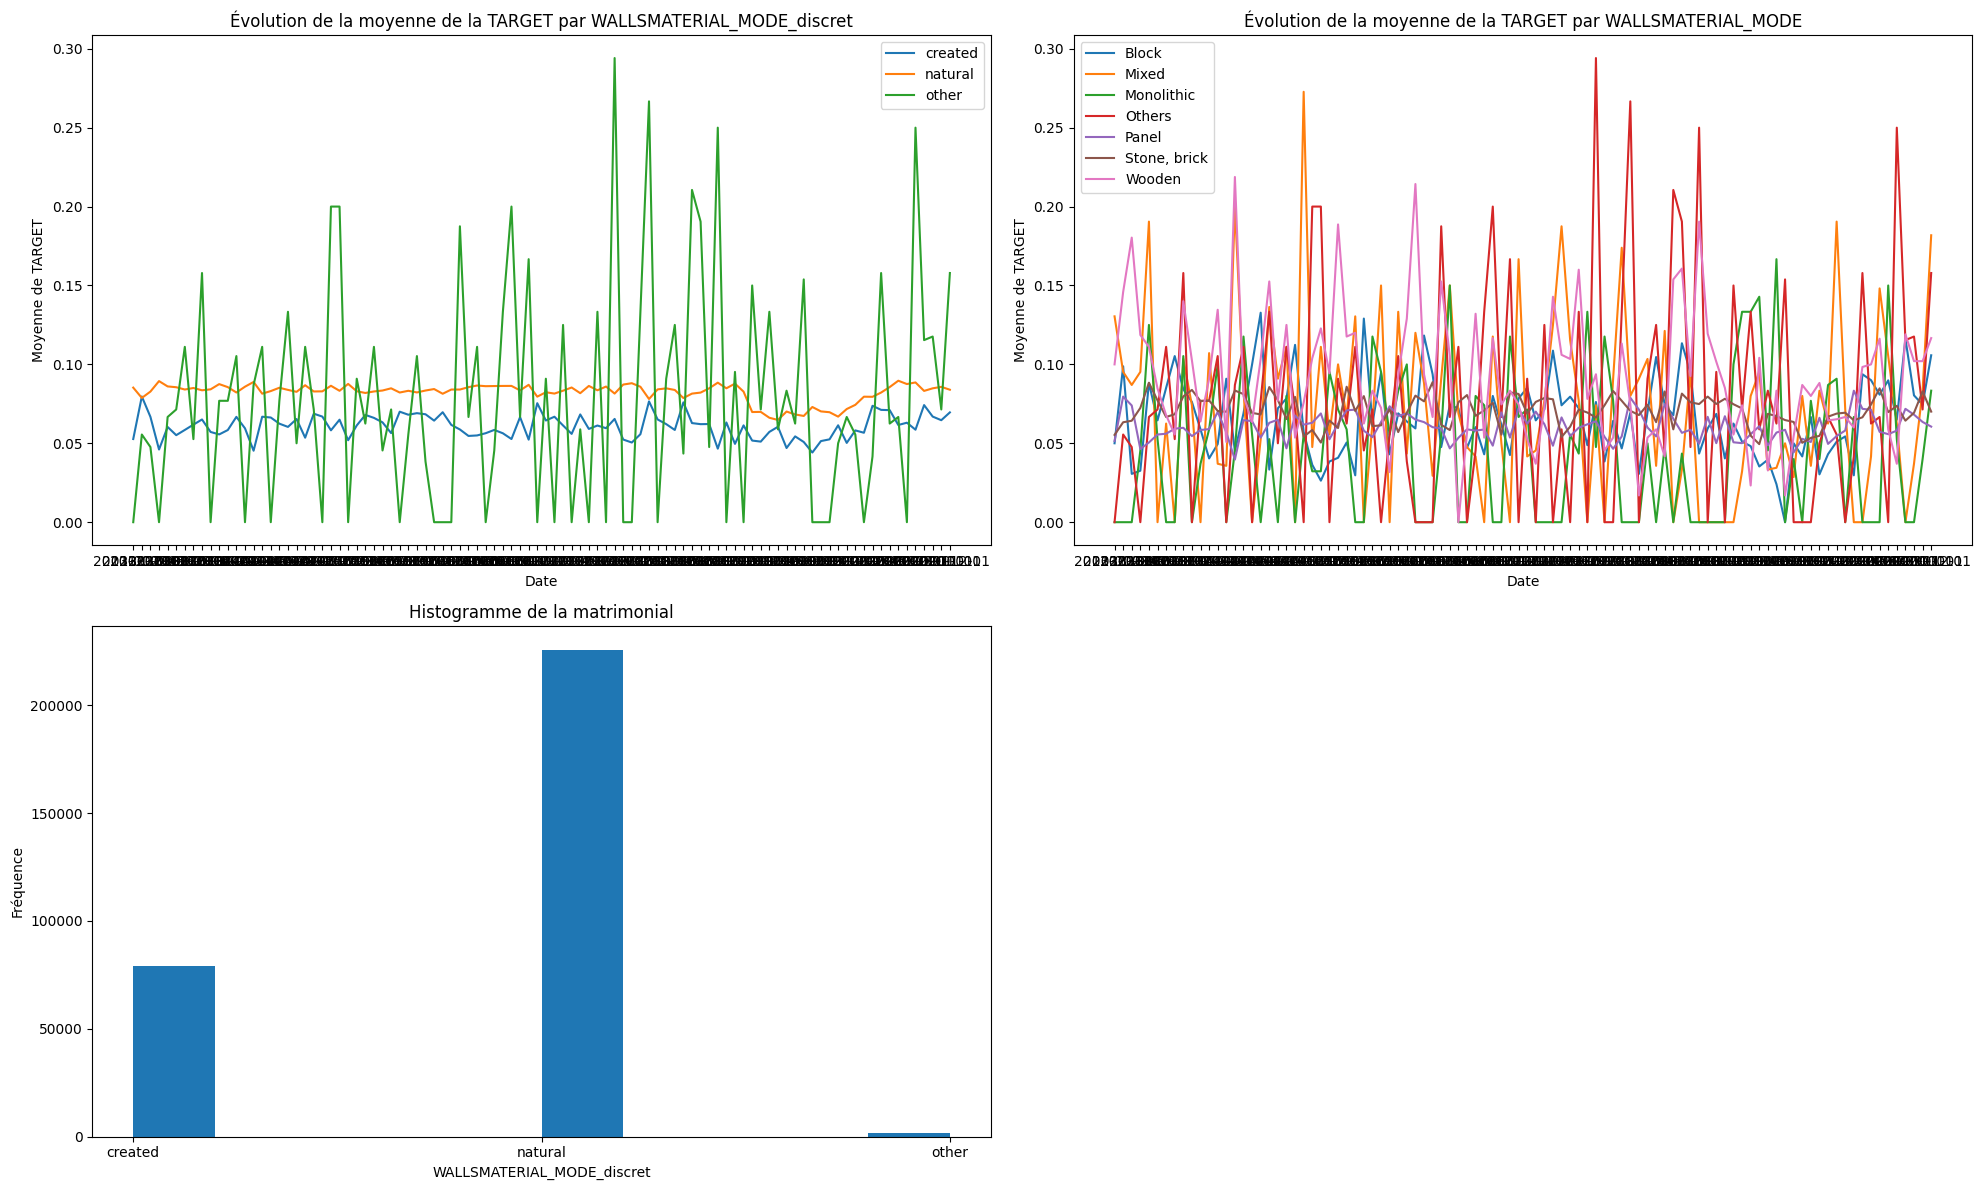

In [128]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['WALLSMATERIAL_MODE_discret', 'WALLSMATERIAL_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["WALLSMATERIAL_MODE_discret"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('WALLSMATERIAL_MODE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## ORGANIZATION_TYPE

In [129]:
list_mean = []
for cat in data['ORGANIZATION_TYPE'].unique():
    moyenne = data[data['ORGANIZATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['ORGANIZATION'] = data['ORGANIZATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne            ORGANIZATION
0   0.149660       Transport: type 3
1   0.125000        Industry: type 8
2   0.121212       Industry: type 13
3   0.111173              Restaurant
4   0.109260            Construction
5   0.106383        Industry: type 1
6   0.104651                Cleaning
7   0.101523                 Realtor
8   0.100706        Industry: type 3
9   0.098214           Trade: type 3
10  0.097371             Agriculture
11  0.097365        Industry: type 4
12  0.096832           Self-employed
13  0.095046                Security
14  0.089964           Trade: type 7
15  0.088343  Business Entity Type 3
16  0.087742       Transport: type 4
17  0.083815           Trade: type 1
18  0.082803                  Mobile
19  0.081784       Industry: type 11
20  0.081395                  Postal
21  0.081287  Business Entity Type 2
22  0.078020  Business Entity Type 1
23  0.077283             Advertising
24  0.076154        Industry: type 7
25  0.075658          Legal Services
26  0.075068                 Housing
27  0.074260       Transport: type 2
28  0.072886                   Other
29  0.071429        Industry: type 6
30  0.070022        Industry: type 2
31  0.069808                 Telecom
32  0.067089           Trade: type 2
33  0.066842            Kindergarten
34  0.066422              Government
35  0.066316             Electricity
36  0.065327        Industry: type 5
37  0.064862        Industry: type 9
38  0.064748               Emergency
39  0.064220       Industry: type 10
40  0.063654                Services
41  0.063278                   Hotel
42  0.062590                Medicine
43  0.061224           Trade: type 5
44  0.058824                Religion
45  0.055449                  School
46  0.055369               Insurance
47  0.052910                 Culture
48  0.051389                     XNA
49  0.049960                    Bank
50  0.048037                Military
51  0.047578                  Police
52  0.046899              University
53  0.046724     Security Ministries
54  0.040000       Transport: type 1
55  0.039872           Trade: type 6
56  0.035326       Industry: type 12
57  0.031250           Trade: type 4

In [130]:
transports = ["Transport: type 3", "Transport: type 2","Transport: type 1"]
industry = ["Industry: type 1", "Industry: type 2", "Industry: type 3", "Industry: type 4",
         "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8",
         "Industry: type 9", "Industry: type 10", "Industry: type 11", "Industry: type 12",
         "Industry: type 13"]
trade = ["Trade: type 7", "Trade: type 6", "Trade: type 5", "Trade: type 4", "Trade: type 3", "Trade: type 2", "Trade: type 1"]

un = transports + industry + trade

other = set(motif['ORGANIZATION'].unique()) - set(un) #motif['ORGANIZATION'].tolist() - un
other = list(other)

In [131]:

transports = ["Transport: type 3", "Transport: type 2","Transport: type 1"]
industry = ["Industry: type 1", "Industry: type 2", "Industry: type 3", "Industry: type 4",
         "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8",
         "Industry: type 9", "Industry: type 10", "Industry: type 11", "Industry: type 12",
         "Industry: type 13"]
trade = ["Trade: type 7", "Trade: type 6", "Trade: type 5", "Trade: type 4", "Trade: type 3", "Trade: type 2", "Trade: type 1"]
data['ORGANIZATION_TYPE_discret'] = np.select(
    [
        data['ORGANIZATION_TYPE'].isin(transports),
        data['ORGANIZATION_TYPE'].isin(industry),
        data['ORGANIZATION_TYPE'].isin(trade),
        data['ORGANIZATION_TYPE'].isin(other)
    ],
    ['transports', 'industry', "trade","other"],
    default='transports')

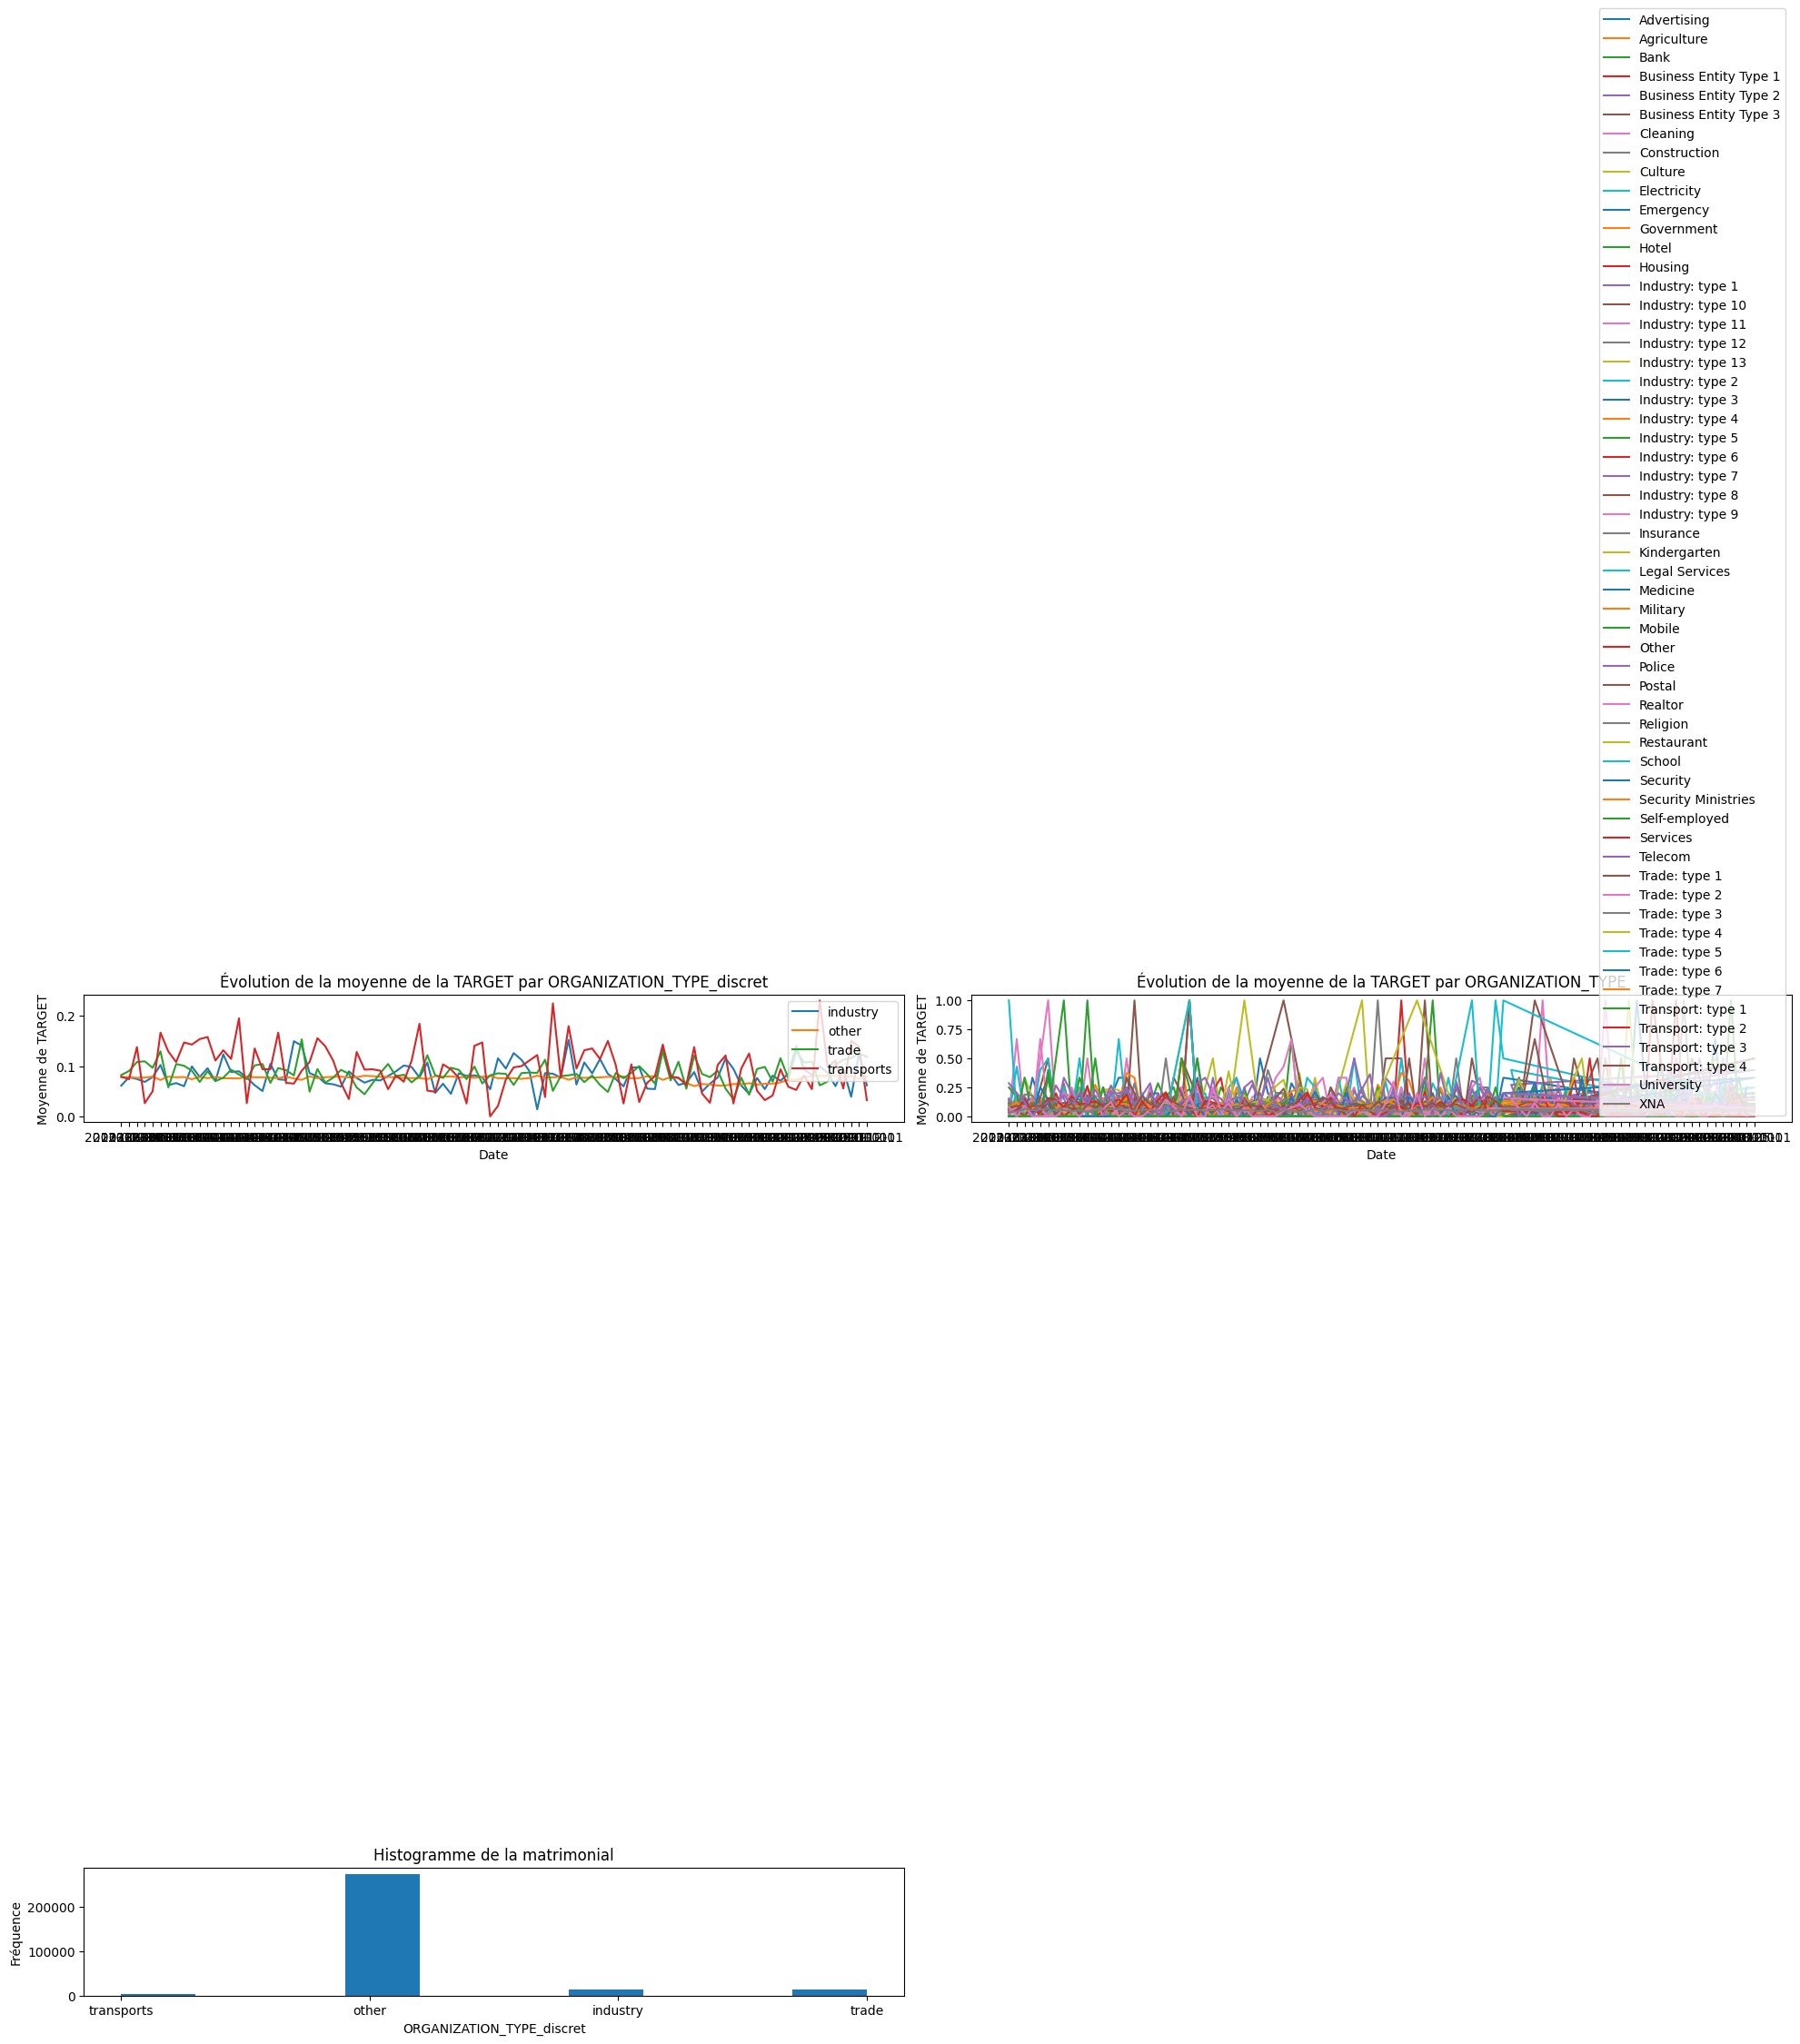

In [132]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['ORGANIZATION_TYPE_discret', 'ORGANIZATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["ORGANIZATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('ORGANIZATION_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [133]:
data.drop(columns=["NAME_TYPE_SUITE_discret", "NAME_TYPE_SUITE",
                   "NAME_INCOME_TYPE_discret", "NAME_INCOME_TYPE",
                   "NAME_EDUCATION_TYPE",
                   "NAME_FAMILY_STATUS_discret", "NAME_FAMILY_STATUS",
                   "OCCUPATION_TYPE",
                   "WEEKDAY_APPR_PROCESS_START_discret", "WEEKDAY_APPR_PROCESS_START",
                   "FONDKAPREMONT_MODE",
                    "HOUSETYPE_MODE",
                    "WALLSMATERIAL_MODE_discret", "WALLSMATERIAL_MODE",
                    "ORGANIZATION_TYPE_discret", "ORGANIZATION_TYPE"], axis=1, inplace=True)

In [134]:
data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE', 'EMERGENCYSTATE_MODE', 'date_mensuelle',
       'NAME_EDUCATION_TYPE_discret', 'OCCUPATION_TYPE_discret',
       'FONDKAPREMONT_MODE_discret', 'HOUSETYPE_MODE_discret'],
      dtype='object')

In [138]:
data.head()

Unnamed: 0  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           0       0             1          292500.0   1102500.0   
1           1       0             0          180000.0    270000.0   
2           2       0             2           67500.0     80865.0   
3           3       0             1          157500.0   1078200.0   
4           4       0             1          112500.0    225000.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        1102500.0                    0.018209      -11763           -688   
1         270000.0                    0.003122      -12460          -2988   
2          67500.0                    0.018634      -11118           -907   
3         900000.0                    0.072508      -14776          -1677   
4         225000.0                    0.004849      -14918           -140   

   DAYS_REGISTRATION  ...  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0             -500.0  ...            M             Y                Y   
1            -1576.0  ...            F             N                Y   
2           -10654.0  ...            F             Y                N   
3            -8387.0  ...            F             Y                Y   
4            -2716.0  ...            F             N                N   

   NAME_HOUSING_TYPE  EMERGENCYSTATE_MODE  date_mensuelle  \
0  House / apartment                   No      2013-01-01   
1       With parents                  NaN      2013-01-01   
2  House / apartment                   No      2013-01-01   
3  House / apartment                   No      2013-01-01   
4  House / apartment                  NaN      2013-01-01   

   NAME_EDUCATION_TYPE_discret  OCCUPATION_TYPE_discret  \
0                        lower              low_skilled   
1                       higher           middle_skilled   
2                        lower              low_skilled   
3                        lower           middle_skilled   
4                        lower           middle_skilled   

   FONDKAPREMONT_MODE_discret  HOUSETYPE_MODE_discret  
0               not_specified              appartment  
1               not_specified                  houses  
2               not_specified              appartment  
3                         reg              appartment  
4               not_specified                  houses  

[5 rows x 55 columns]

In [139]:
data.shape

(306107, 55)